# Developing Inter-Dataset Similarity (IDS) and Intra-Dataset Diversity (IDD) Metrics For StyleGAN Transfer Learning Model Selection

In [4]:
import numpy as np
from PIL import Image
import os

## Inter-Dataset KID Similarity

In [3]:
%cd drive/MyDrive/6998_project/stylegan2-ada-pytorch-dataset-metrics

/content/drive/MyDrive/6998_project/stylegan2-ada-pytorch-dataset-metrics


### SANITY CHECK

In [ ]:
!python3 calc_metrics.py --metrics=kid50k_full --data1=../datasets/ffhq256.zip --data2=../datasets/ffhq256.zip

Dataset 1 options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "../datasets/ffhq256.zip"
}
Dataset 2 options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "../datasets/ffhq256.zip"
}
Launching processes...
Calculating kid50k_full...
{"results": {"kid50k_full": -4.91087737738053e-05}, "metric": "kid50k_full", "total_time": 17.95048499107361, "total_time_str": "18s", "num_gpus": 1, "snapshot_pkl": null, "timestamp": 1639620710.7167351}

Exiting...


### FFHQ

In [ ]:
!python3 calc_metrics.py --metrics=kid50k_full --data1=../datasets/ffhq256.zip --data2=../datasets/boredape-small-256x256.zip

Dataset 1 options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "../datasets/ffhq256.zip"
}
Dataset 2 options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "../datasets/boredape-small-256x256.zip"
}
Launching processes...
Calculating kid50k_full...
dataset features    items 1000    time 23s          ms/item 22.59
{"results": {"kid50k_full": 0.26177064156906915}, "metric": "kid50k_full", "total_time": 42.41807198524475, "total_time_str": "42s", "num_gpus": 1, "snapshot_pkl": null, "timestamp": 1639620630.1541052}

Exiting...


### CELEB A HQ

In [ ]:
!python3 calc_metrics.py --metrics=kid50k_full --data1=../datasets/celeb256.zip --data2=../datasets/boredape-small-256x256.zip

Dataset 1 options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "../datasets/celeb256.zip"
}
Dataset 2 options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "../datasets/boredape-small-256x256.zip"
}
Launching processes...
Calculating kid50k_full...
dataset features    items 1024    time 27s          ms/item 26.05
dataset features    items 2048    time 29s          ms/item 1.88
dataset features    items 3072    time 31s          ms/item 1.92
dataset features    items 4096    time 32s          ms/item 1.88
dataset features    items 5120    time 34s          ms/item 1.88
dataset features    items 6144    time 36s          ms/item 1.89
dataset features    items 7168    time 38s          ms/item 1.88
dataset features    items 8192    time 40s          ms/item 1.88
dataset features    items 9216    time 42s          ms/item 1.88
dataset features    items 10000   time 44s          ms/item 1.89
{"results": {"kid50k_full": 0.2982641550500501}, "metri

### LSUN DOG

In [77]:
!python3 calc_metrics.py --metrics=kid50k_full --data1=../datasets/dog256.zip --data2=../datasets/boredape-small-256x256.zip

Dataset 1 options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "../datasets/dog256.zip"
}
Dataset 2 options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "../datasets/boredape-small-256x256.zip"
}
Launching processes...
Calculating kid50k_full...
dataset features    items 1024    time 31s          ms/item 30.06
dataset features    items 1960    time 33s          ms/item 1.90
dataset features    items 1000    time 17s          ms/item 16.67
{"results": {"kid50k_full": 0.18737122547797794}, "metric": "kid50k_full", "total_time": 65.67752933502197, "total_time_str": "1m 06s", "num_gpus": 1, "snapshot_pkl": null, "timestamp": 1639717072.4051573}

Exiting...


## Random Noise

In [5]:
noise_ds = np.random.uniform(low=0.0, high=255.0, size=(1000,255,255,3))

In [9]:
noise_ds[0,:,:,:].shape

(255, 255, 3)

In [22]:
noise_dir = '/content/noise_images/'

In [13]:
os.mkdir('/content/noise_images')

In [19]:
for img in range(1000):
  im = Image.fromarray(np.uint8(noise_ds[img,:,:,:]))
  im.save(f'/content/noise_images/img_{img}.png')

In [ ]:
!zip -r '/content/noise_ds.zip' $noise_dir

In [29]:
!python3 calc_metrics.py --metrics=kid50k_full --data1=/content/noise_ds.zip --data2=../datasets/boredape-small-256x256.zip

Dataset 1 options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "/content/noise_ds.zip"
}
Dataset 2 options:
{
  "class_name": "training.dataset.ImageFolderDataset",
  "path": "../datasets/boredape-small-256x256.zip"
}
Launching processes...
Calculating kid50k_full...
dataset features    items 1002    time 30s          ms/item 30.34
dataset features    items 1000    time 19s          ms/item 18.80
{"results": {"kid50k_full": 0.6784923849499499}, "metric": "kid50k_full", "total_time": 66.9507052898407, "total_time_str": "1m 07s", "num_gpus": 1, "snapshot_pkl": null, "timestamp": 1639684725.4101803}

Exiting...


## Intra-Dataset Pixel-wise Diversity

In [ ]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

### FFHQ

In [ ]:
ffhq_dir = '/content/ffhq256'

In [ ]:
!mkdir $ffhq_dir

In [ ]:
!unzip ffhq256.zip -d $ffhq_dir

In [35]:
def calc_diversity(ds=None, ds_dir=None, rand_sample_size=1000, padding = 0):
  '''
  calculate diversity of dataset
  ds_dir: relative directory of images
  rand_sample_size: size of the random sample to pull from image dataset
  returns: diversity score as average of depth-wise variance of pixel across channels
  '''
  
  if ds is not None: 
    img_ds = ds
  elif ds_dir:
    #gather images & randomly sample names
    img_list = np.array(os.listdir(ds_dir))
    img_shuf = np.random.choice(img_list, 1000)

    #build dataset w shape: (rand_sample_size,256,256,3)
    img_ds = np.zeros((rand_sample_size,256,256,3))

    for ind, img_name in enumerate(img_shuf):
      img_url = os.path.join(ds_dir, img_name)
      img_arr = np.asarray(Image.open(img_url))

      img_ds[ind] = img_arr 

  #calc variance
  def calc_pixel_var(ds, i, j, c):
    return np.std(img_ds[:,i,j,c])

  flat_variances = []
  #for channel
  for chan in range(3):
    #for row
    for r in range(padding, 256-padding):
      #for column
      for c in range(padding, 256-padding):
        #calc variance for image and append
        flat_variances.append(calc_pixel_var(img_ds, r, c, chan))

  #return ds diversity
  return np.average(flat_variances)

In [ ]:
ffhq_diversity = calc_diversity(ds_dir=ffhq_dir, rand_sample_size=1000, padding = 100)
ffhq_diversity.round(2)

46.44

### CELEB A HQ

In [ ]:
celeb_dir = '/content/celeb256'

In [ ]:
!mkdir $celeb_dir

mkdir: cannot create directory ‘/content/celeb256’: File exists


In [ ]:
!unzip celeb256.zip -d $celeb_dir

In [ ]:
celeb_diversity = calc_diversity(ds_dir=os.path.join(celeb_dir,'celeba_hq_256'), rand_sample_size=1000, padding = 25)
celeb_diversity.round(2)

59.08

### LSUN DOG

In [62]:
dog_dir = '/content/dog256'
dog_resize = '/content/dogresize/'

In [2]:
!mkdir $dog_dir

In [8]:
!ls ../datasets

boredape-small-256x256.zip  celeb256.zip  dogs.zip  ffhq256.zip


In [ ]:
!unzip ../datasets/dogs.zip -d $dog_dir

In [13]:
os.path.join(dog_dir,img_list[0])

'/content/dog256/images'

In [18]:
!mv /content/dog256/images/Images/* /content/dog256/

In [ ]:
for dog_name in os.listdir(dog_dir):
  !mv /content/dog256/$dog_name/* /content/dog256/
  !rm -r /content/dog256/$dog_name

In [19]:
!rm -r /content/dog256/images

In [20]:
!rm -r /content/dog256/annotations

In [40]:
img_list = np.array(os.listdir(dog_dir))
img_shuf = np.random.choice(img_list, 1000)

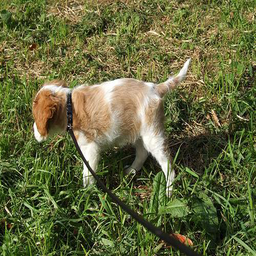

In [54]:
im1 = Image.open(os.path.join(dog_dir,img_shuf[0]))
im1.resize((256, 256), Image.LANCZOS)

In [56]:
for im in img_shuf:
  im1 = Image.open( os.path.join(dog_dir,im) )
  im1 = im1.resize( (256, 256), Image.LANCZOS )
  im1.save(os.path.join(dog_resize,f'{im}.png'))

In [ ]:
!zip -r /content/drive/MyDrive/6998_project/datasets/dog256.zip /content/dog256/

In [69]:
!rm -r $dog_dir

In [ ]:
!unzip /content/drive/MyDrive/6998_project/datasets/dog256.zip -d $dog_dir

In [71]:
!mv /content/dog256/content/dogresize/* $dog_dir

In [73]:
!rm -r /content/dog256/content

In [68]:
dog_dir

'/content/dog256'

In [74]:
dog_diversity = calc_diversity(ds_dir=dog_dir, rand_sample_size=1000, padding = 25)
dog_diversity.round(2)

64.91

### RANDOM NOISE

In [ ]:
noise_ds = np.random.uniform(low=0.0, high=255.0, size=(1000,255,255,3))
noise_diversity = calc_diversity(ds=noise_ds, rand_sample_size=1000, padding = 25)
noise_diversity.round(2)

73.57

### BORED APES

In [ ]:
!ls

boredape-small-256x256.zip  celeb256.zip  ffhq256.zip  lsundog.zip


In [ ]:
boredapes_dir = '/content/boredapes'

In [ ]:
!mkdir $boredapes_dir

mkdir: cannot create directory ‘/content/boredapes/’: File exists


In [ ]:
!ls $boredapes_dir

In [ ]:
!unzip boredape-small-256x256.zip -d $boredapes_dir

In [ ]:
apes_diversity = calc_diversity(ds_dir=os.path.join(boredapes_dir,'00000'), rand_sample_size=1000, padding = 25)
apes_diversity.round(2)

62.8